# Scratch Detection Assignment
Scratch Detection Assignment for a student position in the data science team at NI

<img src="assets/NI_logo.png" width="100" height="100">
Before you start working on this assignment, make sure you meet the prerequisites below: <a href="https://hdjq.fa.us2.oraclecloud.com/hcmUI/CandidateExperience/en/sites/CX_1/job/25017214">Machine Learning Engineer Student Job Description</a>

**Main mandatory requirements:**

- Studying for M.Sc/B.Sc in Computer Science or related technical discipline( M.Sc is a big advantage)
- Remaining studies of at least one and a half years.
- Availability for 3-4 working days a week.

## Introduction:

In the semiconductor industry, **"wafers"** are thin discs of semiconductor material, such as silicon, used to fabricate microelectronic devices such as transistors, integrated circuits, and other components. A single wafer can contain hundreds or thousands of individual devices, known as **"dies"**, which are typically cut or "diced" from the wafer after the manufacturing process is completed.

You can read more about semiconductor here: <a href="https://web.archive.org/web/20230115132446/https://www.amd.com/en/technologies/introduction-to-semiconductors//">Introduction to Semiconductors</a>

<figure>
  <img src="assets/wafer.jpeg" width="350" height="280">
  <figcaption>Fig.1 - An example of a standard wafer</figcaption>
</figure>

One of the challenges in manufacturing wafers is to identify and isolate defects, including scratches, which can affect the performance and reliability of the resulting devices. 

Scratches are seen as elongated clusters of bad dies that have a high aspect ratio, meaning they are relatively thin and long compared to their width. They can be caused by equipment misalignment or mishandling by humans, and may contain latent defects that can affect the performance of the devices. Scratches may not always be continuous, so sometimes there may be good dies within the scratch. These good dies are often marked for removal in a manual process called "**Inked dies**" 

<figure>
  <img src="assets/scratch.png">
  <figcaption>Fig.2 - A scratch on a wafer - an optical view</figcaption>
</figure>

In the data that you receive, there may be faulty dies that are part of a scratch, which are labeled as "Scratch" as well as a few good dies that are part of a scratch, which are labeled as "Ink."

Many times, the Scratch Detection process will be done on the logical wafer map and not on a visual image of it.

The data that you received is called **"wafer map"** as it maps the status of all dies in the wafer.

The dies in the wafers are tested in a large number of stations, operations, and in each operation it is possible to create a map of the dies in this operation by coloring the good dies in a certain color and the faulty dies in another color.

<figure>
  <img src="assets/wafer_map.png" width="300" height="300">
  <figcaption>Fig.3 - A logical wafer map in a certain operation. good dies in green and bad dies in red</figcaption>
</figure>

Did you notice a scratch on this wafer?

Well, with our eyes it is easy to notice the scratch that comes out from the right side in the center of the wafer. 

Note, that this scratch is not continuous, meaning, not all the dies which are placed on this scratch are considered faults in this operation. We have to identify all scracthed dies including bad & good. The good dies that are part of the scartch have to be itendified actively in order to be killed. This process is called "inking". 

We kill them because we fear that a physical scratch on the silicon wafer is what caused the sequence of these faulty dies, therefore even dies that passed the tests may be of low quality because they were damaged by the scratch on which they are placed.

<figure>
  <img src="assets/wafer_map_with_marks.png" width="300" height="300">
  <figcaption>Fig.4 - A wafer map in a certain operation with scratch detection marks. good dies in grenn, bad dies in red, scratch in blue, ink in yellow</figcaption>
</figure>

You can read more about the causes of die failures here: <a href="https://semiengineering.com/why-chips-die//">Why Chips Die</a>

## Assignment description

In this assignment you are receiving wafer maps in a certain operation and the goal is to predict whether a given die belongs to scratch or not.

The data includes information about individual dies from a number of wafers.

The table data includes the following columns:

-  `WaferName` : The name of the wafer from which the die came.
- `DieX`: The horizontal position of the die on the wafer.
- `DieY`: The vertical position of the die on the wafer.
- `IsGoodDie`: A binary column indicating whether the die is good or not.
- `IsScratchDie`: A binary column indicating whether the die belongs to a scratch or not.

Your goal is to use the training data to build a model that can predict, given a certain wafer map, the dies on the map that are parts of a scratch (whether they are bad, 'Scratch' or good, 'Ink').

*The purpose of the assignment is mainly to get to reasonable solution that can help the business. Please note that real industry solutions usually achieve lower scores than you may be used from academic problems so even a low metric score on the test set may be considered a success*

Business goals:

- **Automation**. This process is currently a manual and expensive procedure that takes a lot of time and is prone to errors by the tagger. The goal is to perform this procedure in a faster time and save the costs of the test
- **Quality**. increasing the quality of the dies while balancing quality and yield (on the one hand, not to miss scratches, on the other hand not to do too much "Ink")
- **Prediction Level**. As explained above, the main goal is to detect individual dies, but sometimes it will help to also get a classification at the wafer level, (binary classification, is there a scratch on this wafer or not?) because there are manufacturers who return scratched wafers to the factory.

**Note**. In wafers with a low yield (that is, a lot of faulty dies), we will **not** perform scratch detection because the customer is afraid to find randomly generated scratches there and perform unnecessary ink. In such cases, the customer will make sure to check all the dies strictly in any case, but regardless of the detection of scratches. Therefore, in these cases we will not consider a sequence of bad die to be scratch. 

You are free to use any machine learning technique you find appropiate for solving this problem. Make sure choosing the relevamt metrics to test your solutions's performance.

In addition to the training data, you are given a test set, which includes the x and y coordinates and the good/not status of each die, but does not include the scratch/not scratch labels. 

You are asked to use your model to predict the scratch/not scratch status of the dies in the test set, and to save the predictions in a CSV file. You should submit your notebook including the experiments you did along the way to improve the model/various methods you tried and including your final model.

Pay attention to the following points:

- Exploratoration and analyze the data
- Consideration of business goals
- Selection of relevant machine learning models
- Appropriate choice of metrics

## Submission

1. After completing the assignment please review your notebook, making sure it ran properly from start to finish
2. Create the prediction column for the test set as described in the notebook and save the results to a CVS file
3. Send an email to the following:
    - tomer.zemelman@emerson.com 
    - The email should include a zip file with your notebook and a CSV file with the prediction.
4. After receiving the email with the assignment we will inform you about the next steps


Good Luck!

# Start work

In [1]:
import pandas as pd
import zipfile
from datetime import datetime

### Load Data

In [2]:
#load zip file
zf = zipfile.ZipFile('data.zip') 

In [3]:
#load train data
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers.head()

,WaferName,DieX,DieY,IsGoodDie,IsScratchDie
0,8PFrAN,0,27,True,False
1,8PFrAN,0,28,True,False
2,8PFrAN,0,29,True,False
3,8PFrAN,0,30,True,False
4,8PFrAN,0,31,True,False


In [5]:
#load test data
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))
df_wafers_test.head()

,WaferName,DieX,DieY,IsGoodDie
0,mZa9ls,0,23,True
1,mZa9ls,0,24,True
2,mZa9ls,0,25,True
3,mZa9ls,0,26,True
4,mZa9ls,0,27,True


You can draw the wafers map to see how the wafers look like in the data. 

Using the following helper function you can draw the wafer maps with or without labels:

In [6]:
def plot_wafer_maps(wafer_df_list, figsize, labels = True):
    """
    plot wafer maps for list of df of wafers

    :param wafer_df_list: list, The list of df's of the wafers
    :param figsize: int, the size of the figsize height 
    :param labels: bool, Whether to show the layer of labels (based on column 'IsScratchDie')
    
    :return: None
    """
    def plot_wafer_map(wafer_df, ax, map_type):
        wafer_size = len(wafer_df)
        s = 2**17/(wafer_size)
        if map_type == 'Label':
            mes = 'Scratch Wafer' if (wafer_df['IsScratchDie'] == True).sum()>0 else 'Non-Scratch Wafer'
        else:
            mes = 'Yield: ' + str(round((wafer_df['IsGoodDie']).sum()/(wafer_df['IsGoodDie']).count(), 2)) 
        
        ax.set_title(f'{map_type} | Wafer Name: {wafer_df["WaferName"].iloc[0]}, \nSum: {len(wafer_df)} dies. {mes}', fontsize=20)
        ax.scatter(wafer_df['DieX'], wafer_df['DieY'], color = 'green', marker='s', s = s)

        bad_bins = wafer_df.loc[wafer_df['IsGoodDie'] == False]
        ax.scatter(bad_bins['DieX'], bad_bins['DieY'], color = 'red', marker='s', s = s)
        
        if map_type == 'Label':
            scratch_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == False)]
            ax.scatter(scratch_bins['DieX'], scratch_bins['DieY'], color = 'blue', marker='s', s = s)

            ink_bins = wafer_df.loc[(wafer_df['IsScratchDie'] == True) & (wafer_df['IsGoodDie'] == True)]
            ax.scatter(ink_bins['DieX'], ink_bins['DieY'], color = 'yellow', marker='s', s = s)

            ax.legend(['Good Die', 'Bad Die', 'Scratch Die', 'Ink Die'], fontsize=8)
        else:
            ax.legend(['Good Die', 'Bad Die'], fontsize=8)

        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False) 
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    if labels:
        fig, ax = plt.subplots(2, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize*2))
        for idx1, wafer_df in enumerate(wafer_df_list):
            for idx2, map_type in enumerate(['Input', 'Label']):
                plot_wafer_map(wafer_df, ax[idx2][idx1], map_type)
    else:
        fig, ax = plt.subplots(1, len(wafer_df_list), figsize=(figsize*len(wafer_df_list), figsize))
        for idx, wafer_df in enumerate(wafer_df_list):
            plot_wafer_map(wafer_df, ax[idx], 'Input')

    plt.show()

Select the amount of samples you want to display:

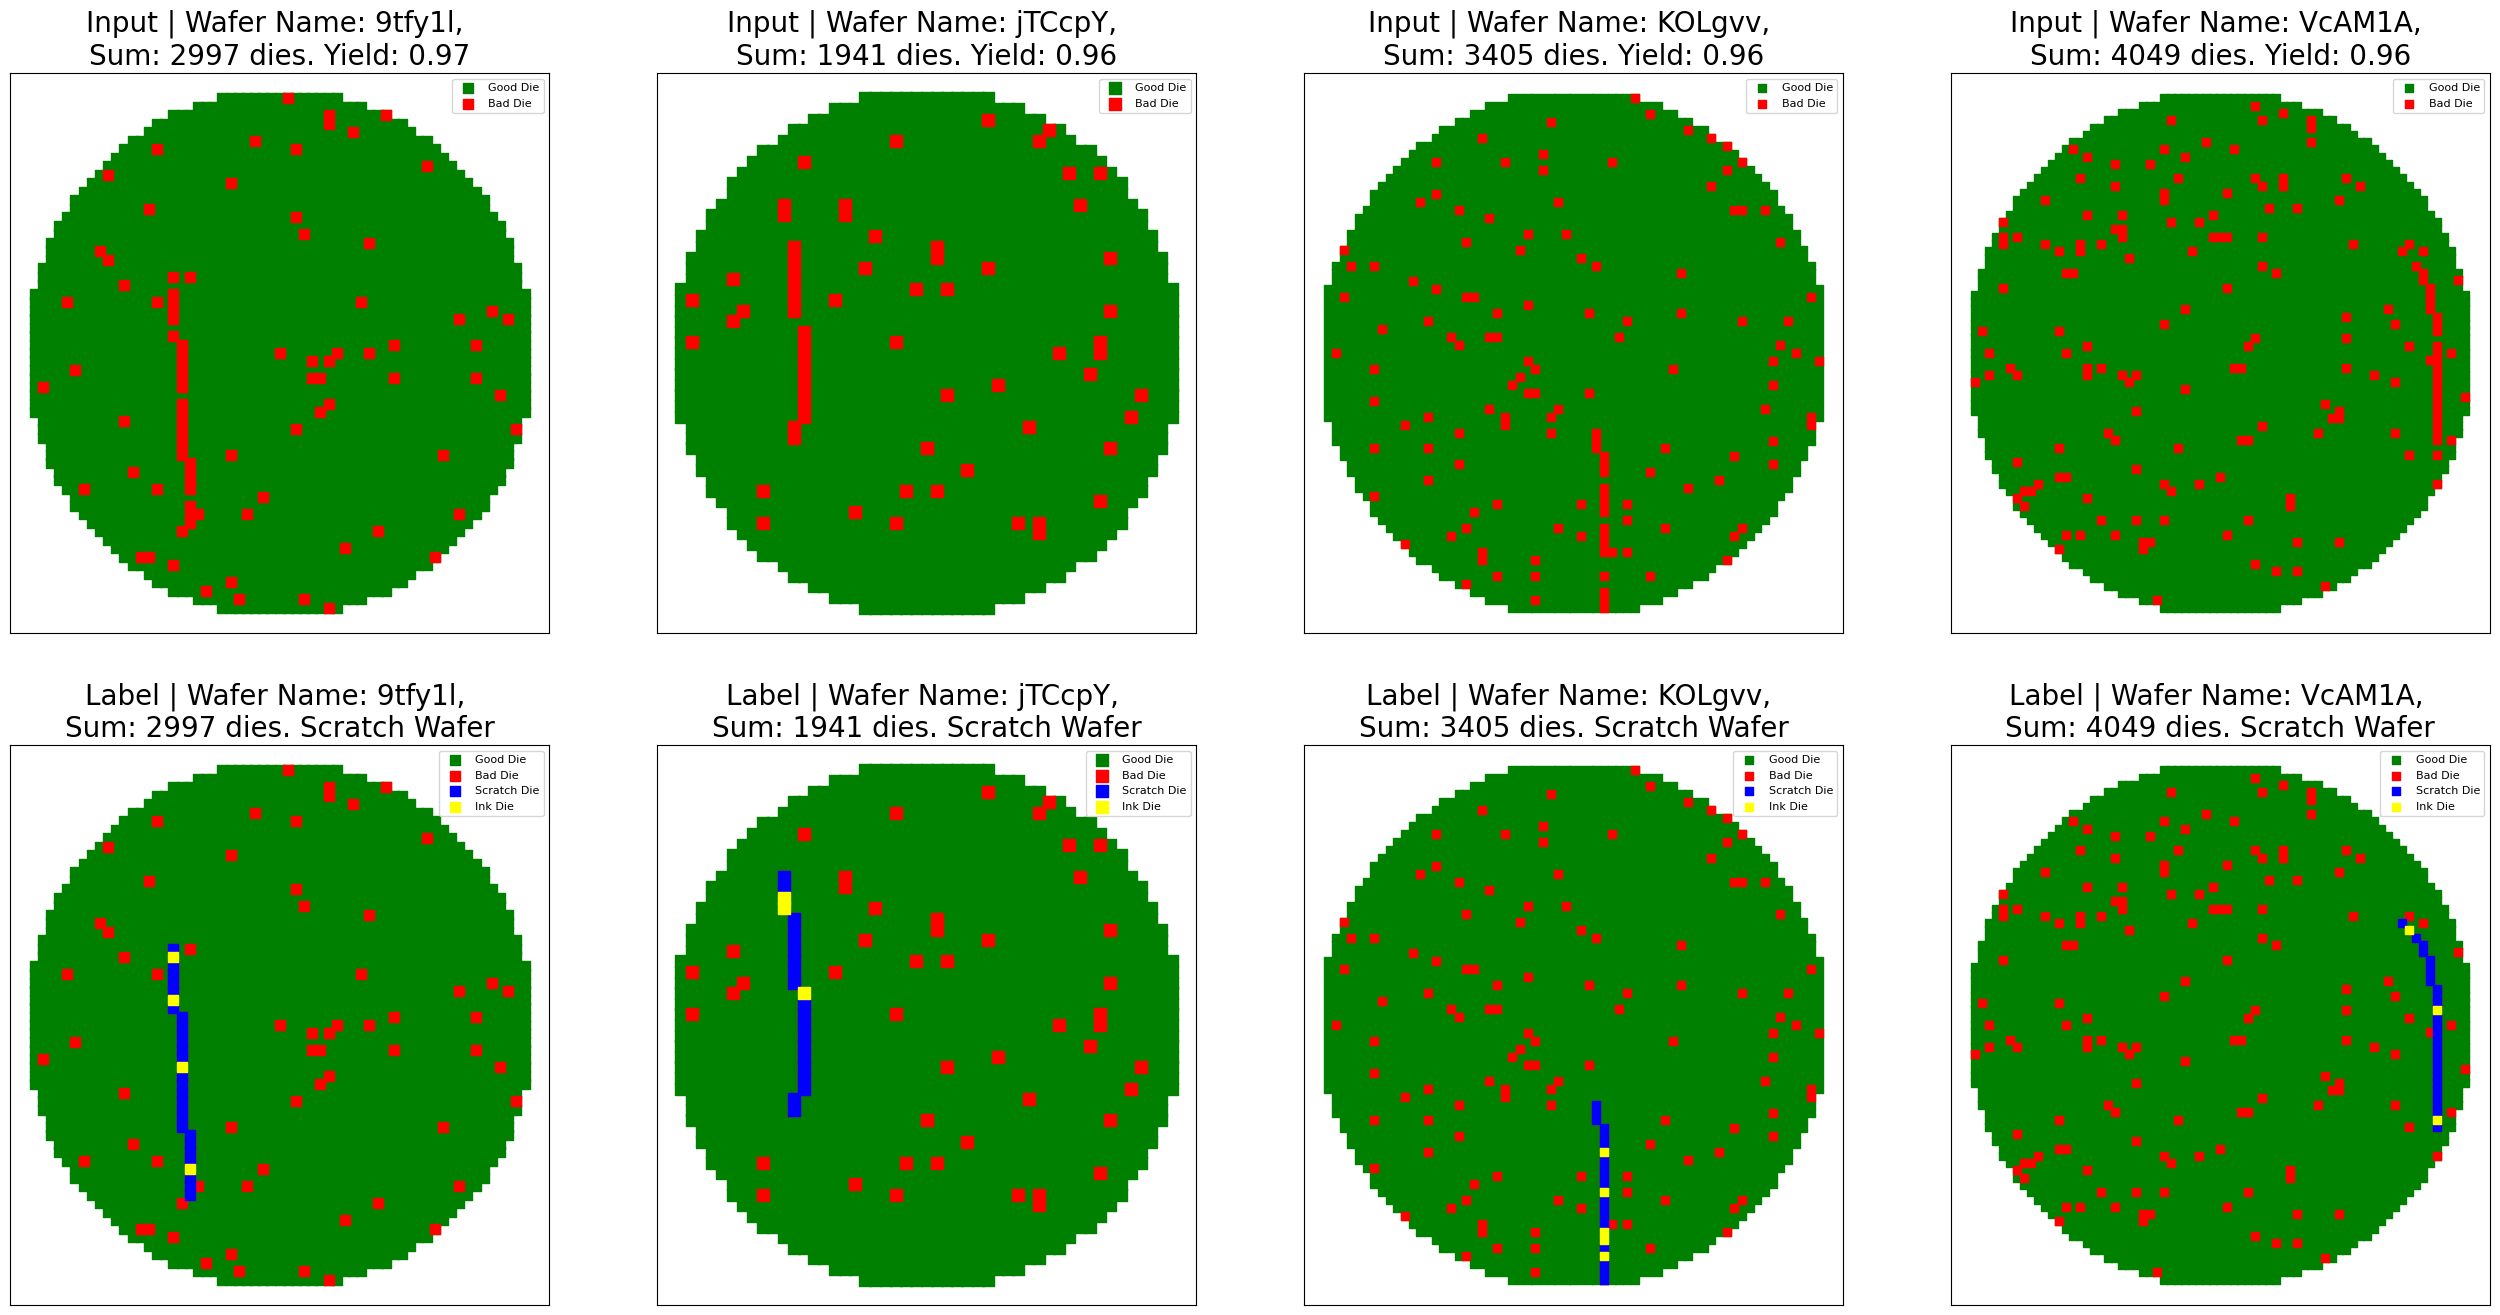

In [7]:
n_samples = 4
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

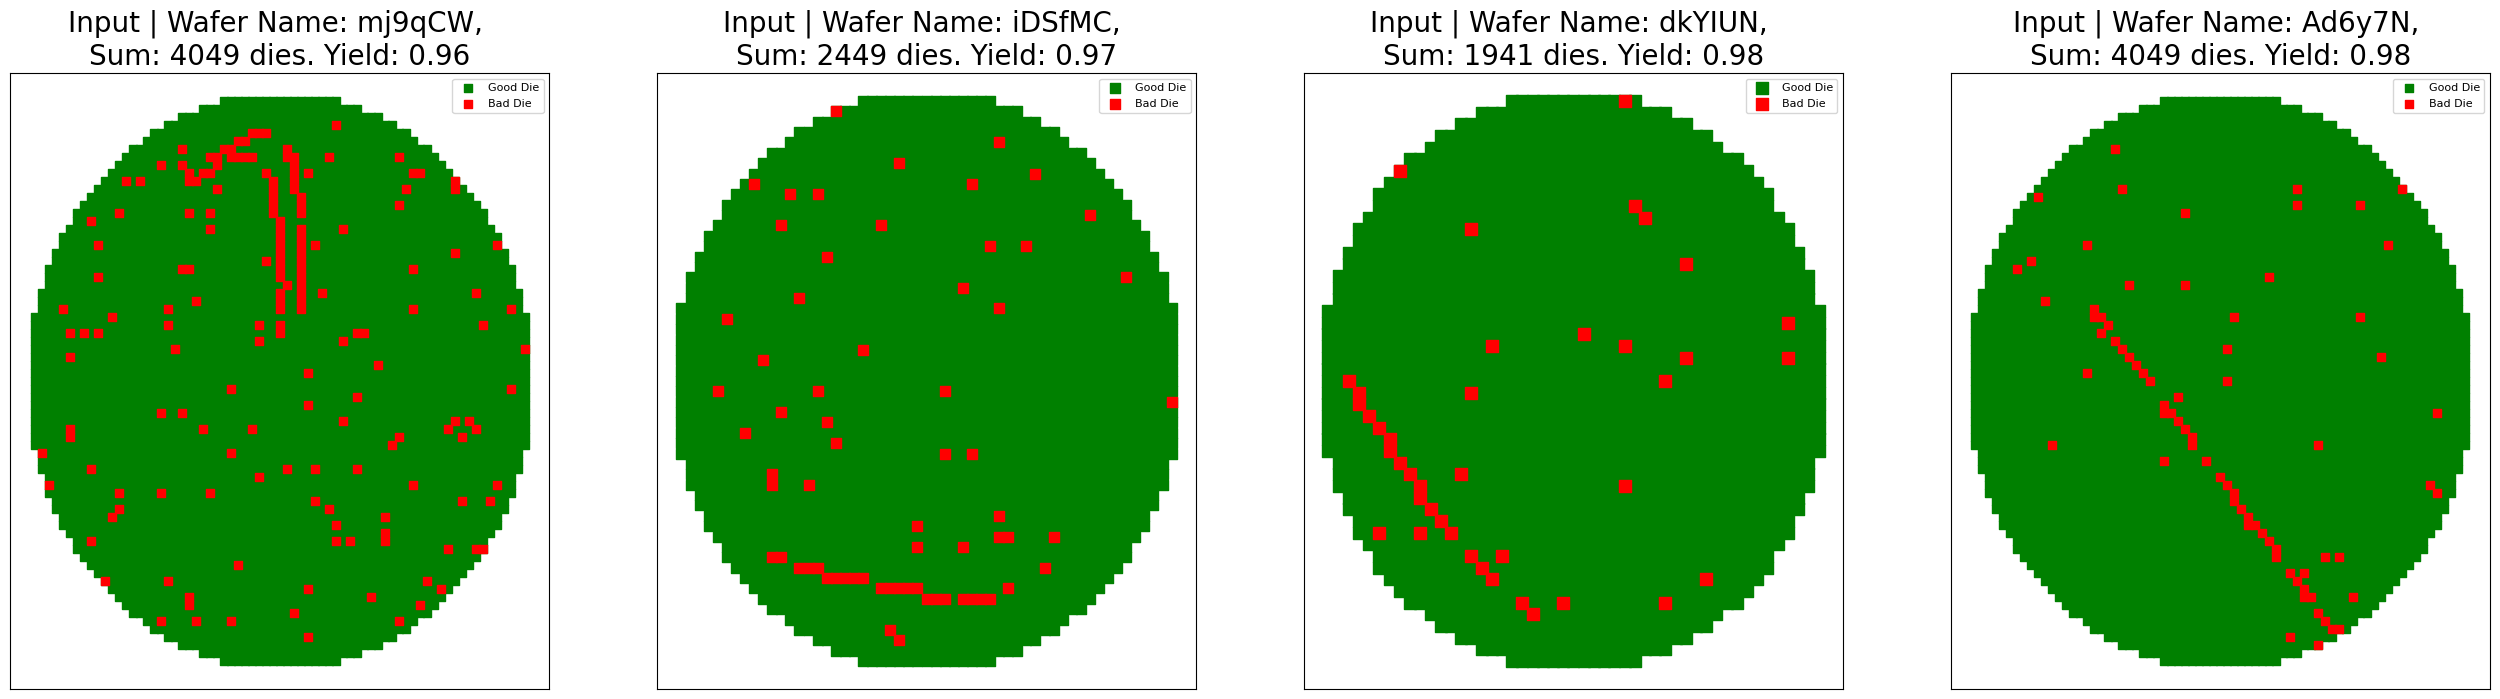

In [10]:
list_sample_test = [df_wafers_test.groupby('WaferName').get_group(group) for group in df_wafers_test['WaferName'].value_counts().sample(n_samples, random_state=20).index]
plot_wafer_maps(list_sample_test, figsize = 8, labels = False)

# Build your solution

In [11]:
import pandas as pd
import zipfile
from datetime import datetime

In [12]:
#TODO build your solution
zf = zipfile.ZipFile('data.zip') 
df_wafers = pd.read_csv(zf.open('wafers_train.csv'))
df_wafers_test = pd.read_csv(zf.open('wafers_test.csv'))

df_wafers.describe()

,DieX,DieY
count,1.041540e+07,1.041540e+07
mean,2.892736e+01,2.892736e+01
std,1.603043e+01,1.603043e+01
min,0.000000e+00,0.000000e+00
25%,1.600000e+01,1.600000e+01
50%,2.800000e+01,2.800000e+01
75%,4.100000e+01,4.100000e+01
max,7.000000e+01,7.000000e+01


## EDA PART

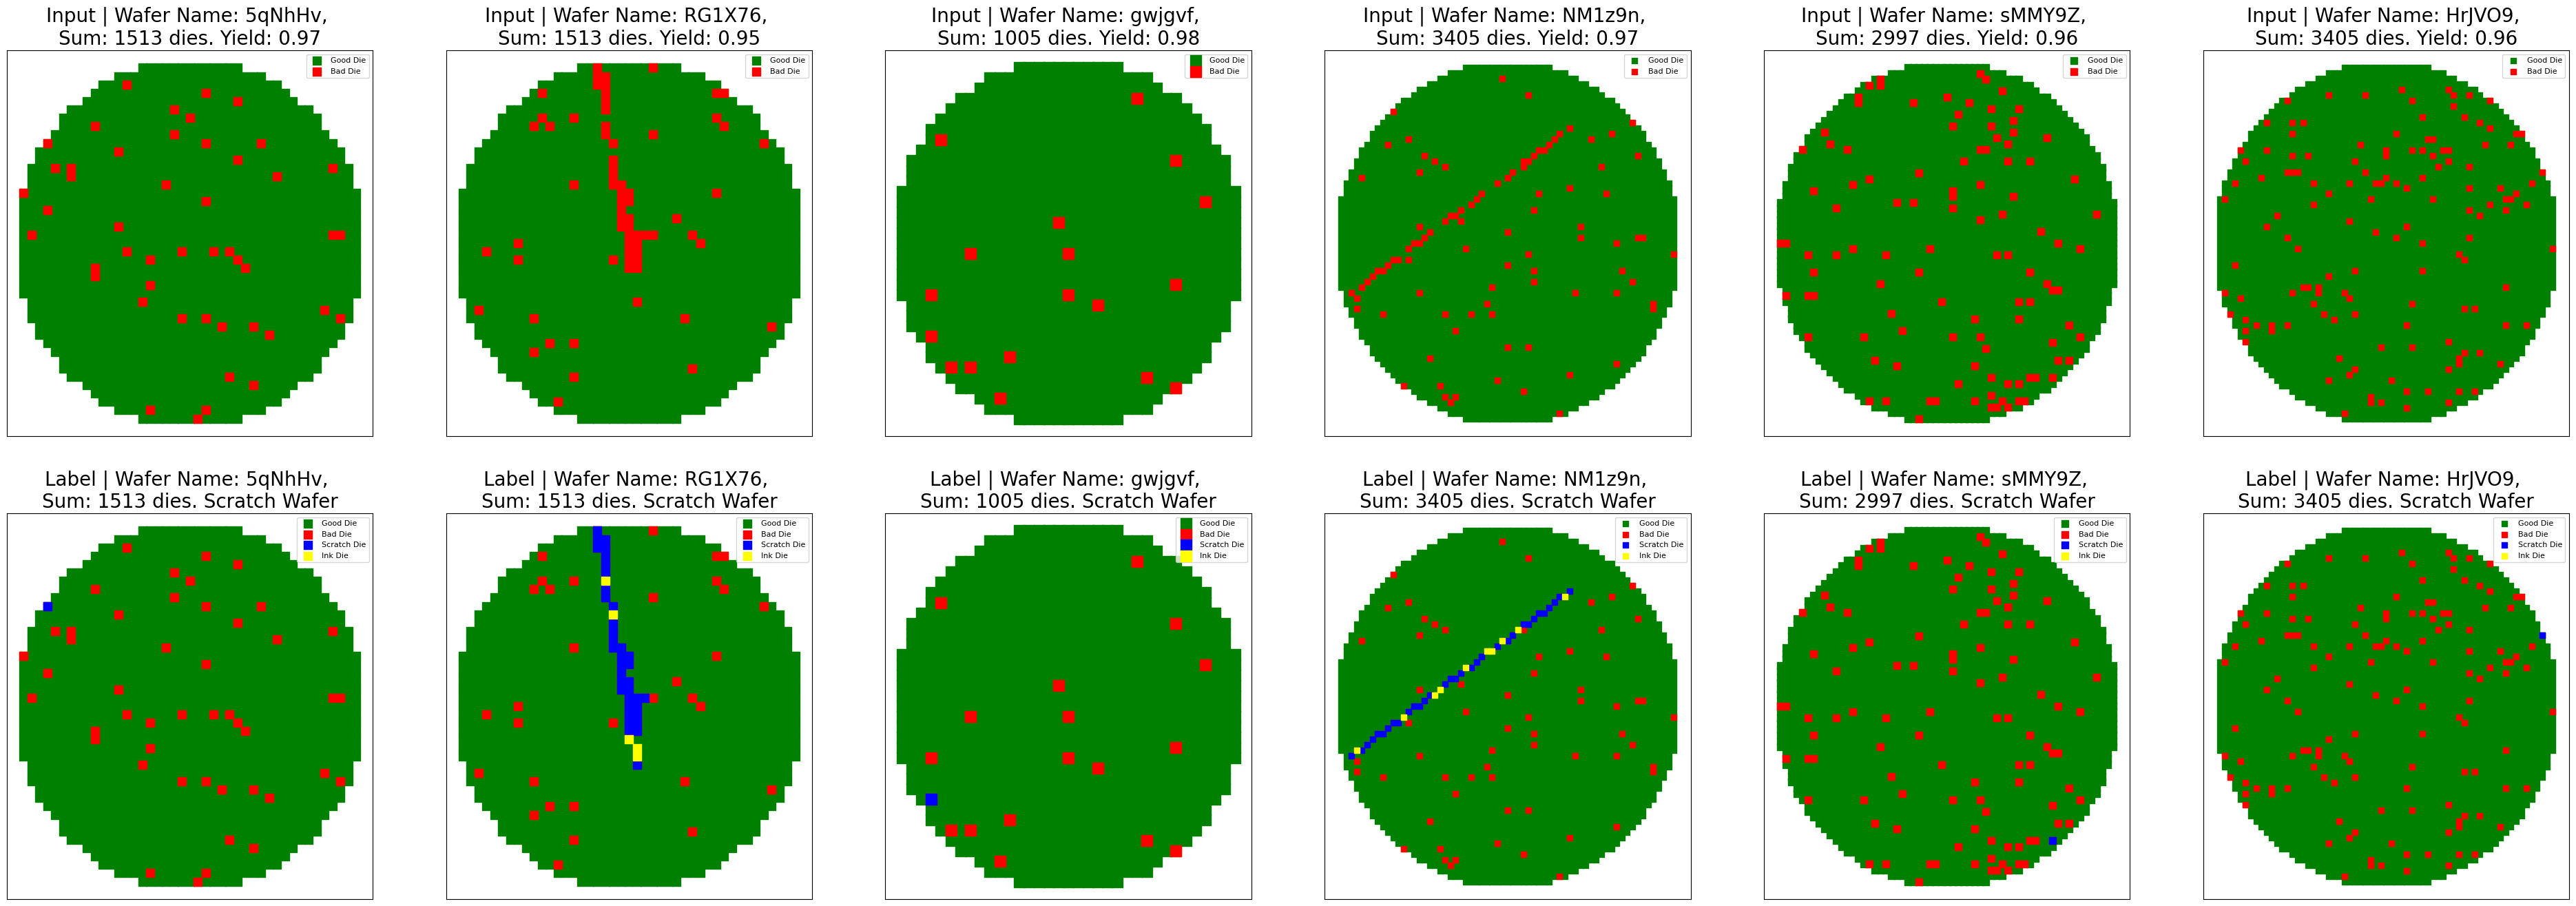

In [27]:
n_samples = 6
list_sample_train = [df_wafers.groupby('WaferName').get_group(group) for group in df_wafers['WaferName'].value_counts().sample(n_samples, random_state=111).index]
plot_wafer_maps(list_sample_train, figsize = 8, labels = True)

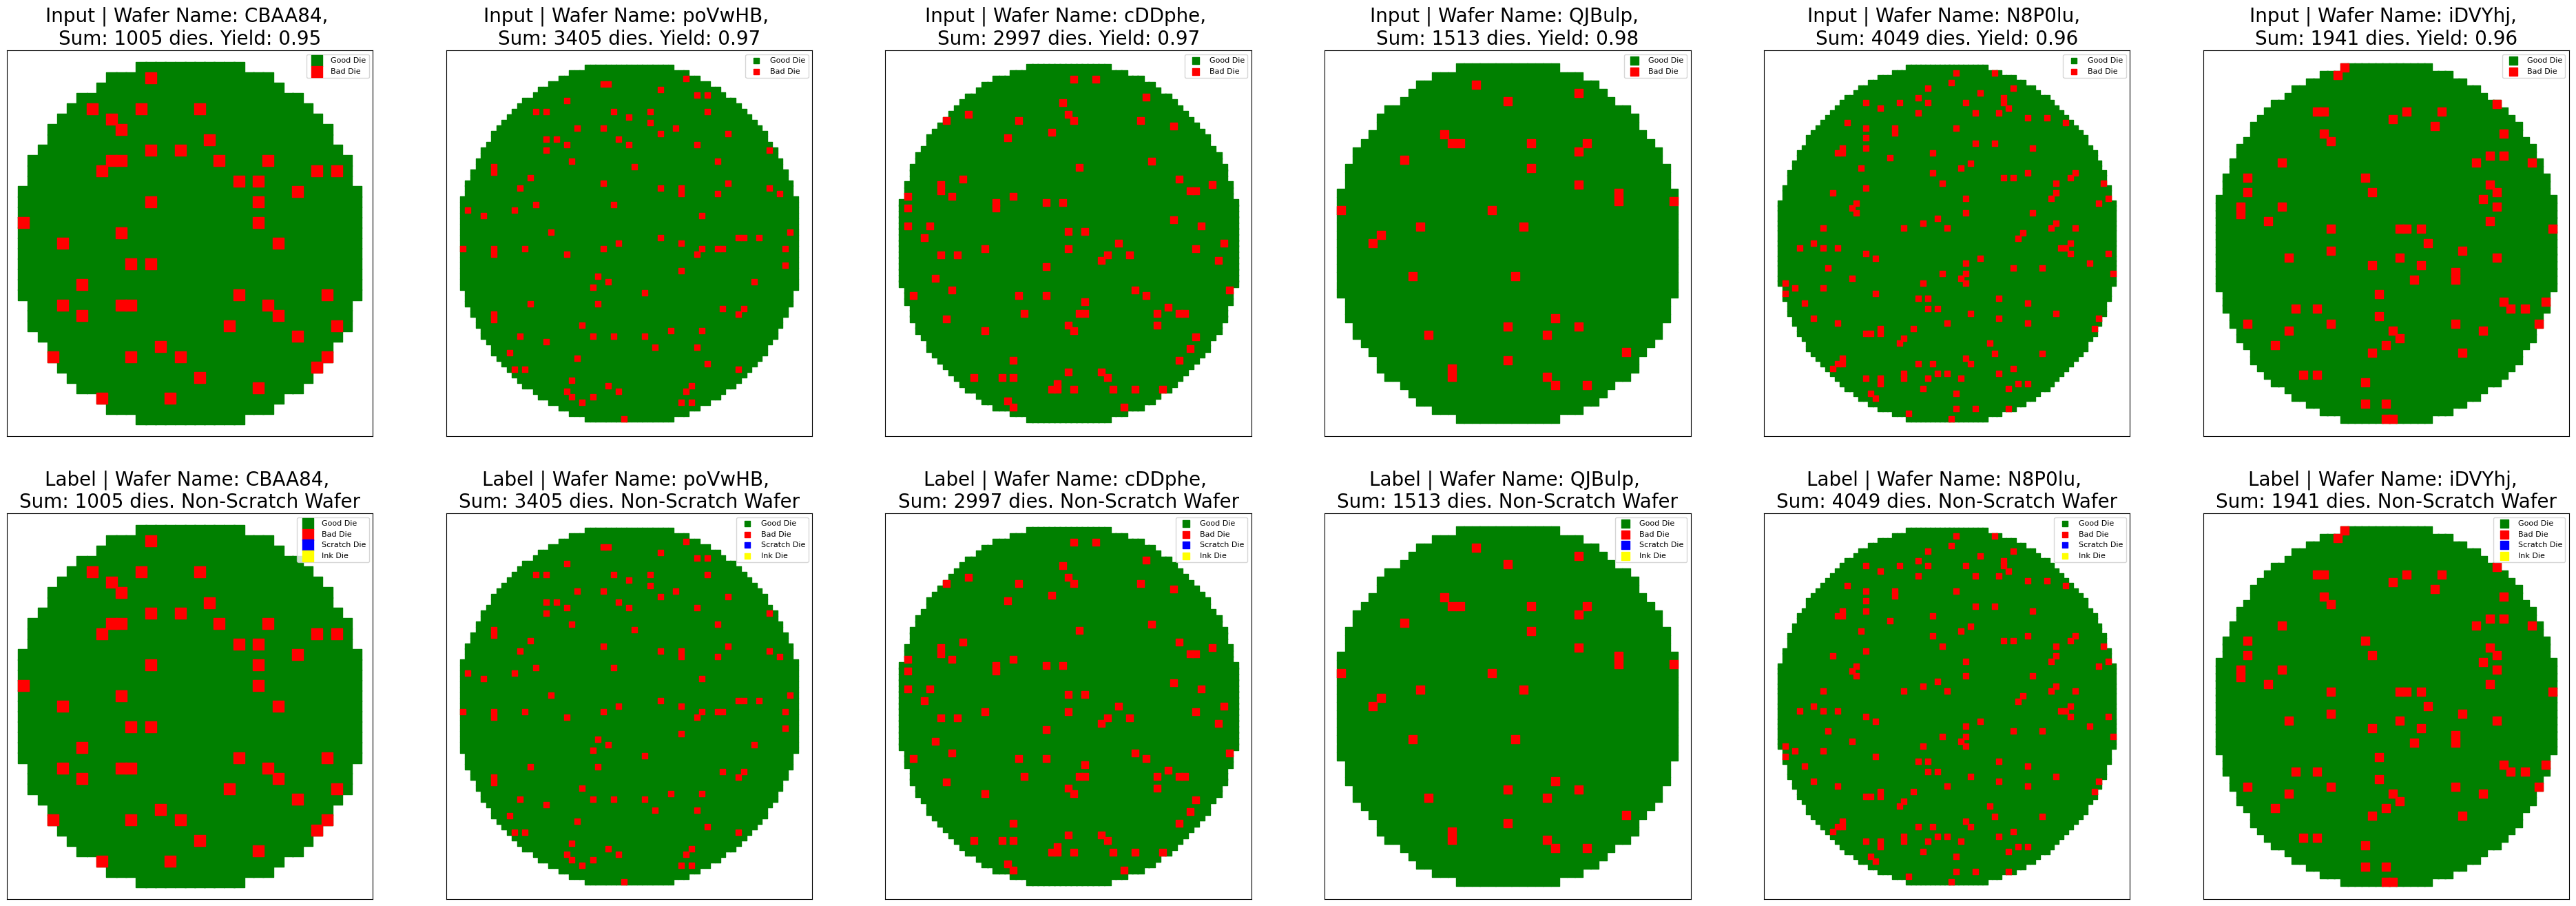

In [13]:
np.random.seed(42)

# Want to check all wafers without scratches
scratch_counts = df_wafers.groupby('WaferName')['IsScratchDie'].sum()
no_scratch_wafers = scratch_counts[scratch_counts == 0].index.tolist()


selected = np.random.choice(no_scratch_wafers, size=6, replace=False)

wafer_df_list = [df_wafers[df_wafers['WaferName'] == w] for w in selected]

# vizualize
plot_wafer_maps(wafer_df_list, figsize=8, labels=True)

In [3]:
missing_counts = df_wafers.isnull().sum()
print(missing_counts)

WaferName       0
DieX            0
DieY            0
IsGoodDie       0
IsScratchDie    0
dtype: int64


## Ensemble Version

In [ ]:
# neccesary installs
!pip install shap
!pip install optuna 

In [13]:
import shap
import numpy as np
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve,
    precision_recall_curve
)
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from skimage.transform import radon                  # pip install scikit-image  if missing
import xgboost as xgb                               # pip install xgboost
from sklearn.metrics import roc_auc_score, f1_score
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import OPTICS
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

g:\Projects\WaferScratchDetection\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Data engeneering

In [14]:
def add_yield_per_wafer(df):
    wafer_yield = df.groupby('WaferName')['IsGoodDie'].mean().rename('wafer_yield')
    df = df.join(wafer_yield, on='WaferName')
    return df

def add_neighbor_bad_counts(df, grid_sizes=[3, 5, 7]):
    for grid in grid_sizes:
        key = f'bad_in_{grid}x{grid}'
        df[key] = 0
        for wafer, wafer_df in df.groupby('WaferName'):
            coords = wafer_df[['DieX', 'DieY']].values
            is_bad = (~wafer_df['IsGoodDie'].astype(bool)).values
            tree = cKDTree(coords)
            neighbors = tree.query_ball_tree(tree, r=(grid//2))
            bad_counts = np.array([is_bad[n].sum() - is_bad[i] for i, n in enumerate(neighbors)])
            df.loc[wafer_df.index, key] = bad_counts
    return df

def add_distance_to_closest_bad(df):
    df['distance_to_closest_bad'] = np.nan
    for wafer, wafer_df in df.groupby('WaferName'):
        coords = wafer_df[['DieX', 'DieY']].values
        bad_mask = ~wafer_df['IsGoodDie'].astype(bool)
        bad_coords = wafer_df.loc[bad_mask, ['DieX', 'DieY']].values
        if len(bad_coords) > 0:
            bad_tree = cKDTree(bad_coords)
            dists, _ = bad_tree.query(coords, k=1)
            df.loc[wafer_df.index, 'distance_to_closest_bad'] = dists
        else:
            df.loc[wafer_df.index, 'distance_to_closest_bad'] = np.nan
    return df

def add_dist_to_edge(df):
    """
    Добавляет признак dist_to_edge_norm ∈ [0,1]:
    0  → прямо на самом крае
    1  → в центре вафера
    """
    # сначала найдём габариты внутри каждого вафера
    mins = df.groupby('WaferName')[['DieX', 'DieY']].min()
    maxs = df.groupby('WaferName')[['DieX', 'DieY']].max()
    span = (maxs - mins)

    df = df.join(mins, on='WaferName', rsuffix='_min')
    df = df.join(maxs, on='WaferName', rsuffix='_max')
    df = df.join(span,  on='WaferName', rsuffix='_span')

    # расстояние до ближайшей границы по X и Y
    dx = (df['DieX'] - df['DieX_min']).clip(upper=None)
    dx = np.minimum(dx, df['DieX_max'] - df['DieX'])
    dy = (df['DieY'] - df['DieY_min']).clip(upper=None)
    dy = np.minimum(dy, df['DieY_max'] - df['DieY'])

    # нормируем (0–1) — чем больше, тем дальше от края
    df['dist_to_edge_norm'] = (dx + dy) / (df['DieX_span'] + df['DieY_span'])

    return df.drop(columns=['DieX_min','DieY_min','DieX_max','DieY_max','DieX_span','DieY_span'])

def add_filled_line_score(df, gap_tol=2):
    """
    Для каждого вафера считаем, какая доля bad-die в линии НЕ пропущена.
    1.0  → сплошная цепочка
    0.0  → разрозненные точки
    """
    scores = []
    for wafer, wdf in df.groupby('WaferName'):
        line_angle = wdf['radon_angle_max'].iloc[0]
        # проекция координат вдоль линии
        rad = np.deg2rad(line_angle)
        proj = wdf['DieX']*np.cos(rad) + wdf['DieY']*np.sin(rad)

        bad_proj = proj[~wdf['IsGoodDie']]
        if len(bad_proj) < 2:
            scores.append((wafer, 0.0))
            continue

        bad_sorted = np.sort(bad_proj)
        gaps = np.diff(bad_sorted)
        missing = (gaps > gap_tol).sum()
        score = 1 - missing / len(gaps)          # чем меньше пробелов, тем ближе к 1
        scores.append((wafer, score))

    wafer_feat = pd.DataFrame(scores, columns=['WaferName','filled_line_score']).set_index('WaferName')
    return df.join(wafer_feat, on='WaferName')


# aditional data enrichment for marking ink dies
def add_bad_density_corridor(df, corridor_width=1, min_bad=10):
    """
    Добавляет wafer-level признак `bad_corridor_ratio`
    = доля bad-die в коридоре ± corridor_width вокруг линейной регрессии
    """
    ratios = []

    for wafer, wdf in df.groupby("WaferName"):
        bad_mask = ~wdf["IsGoodDie"].astype(bool)
        bad_coords = wdf.loc[bad_mask, ["DieX", "DieY"]].values

        # мало bad-die → признак = 0
        if len(bad_coords) < min_bad:
            ratios.append((wafer, 0.0))
            continue

        # простая линейная регрессия y = a·x + b
        x, y = bad_coords[:, 0], bad_coords[:, 1]
        a, b = np.polyfit(x, y, 1)          # slope, intercept

        # расстояния всех die до линии
        # dist = |a·x - y + b| / sqrt(a^2 + 1)
        denom = np.sqrt(a*a + 1)
        dists = np.abs(a * wdf["DieX"] - wdf["DieY"] + b) / denom

        # кто попал в коридор?
        in_corridor = dists <= corridor_width
        corridor_bad = (~wdf["IsGoodDie"] & in_corridor).sum()
        corridor_all = in_corridor.sum()

        ratio = corridor_bad / corridor_all if corridor_all else 0.0
        ratios.append((wafer, ratio))

    wafer_feat = pd.DataFrame(ratios, columns=["WaferName", "bad_corridor_ratio"]).set_index("WaferName")
    return df.join(wafer_feat, on="WaferName")


# radon features
def compute_radon_features(df, thetas=np.linspace(0., 180., 181, endpoint=False)):
    """
    for every wafer build a binary mask of bad dies and
    run a Radon transform to detect strong linear structures
    """
    feats = []
    for wafer, wdf in df.groupby("WaferName"):
        xs, ys = wdf["DieX"].astype(int).values, wdf["DieY"].astype(int).values
        img = np.zeros((ys.max() - ys.min() + 1, xs.max() - xs.min() + 1), dtype=np.uint8)
        img[ys - ys.min(), xs - xs.min()] = (~wdf["IsGoodDie"].astype(bool)).values  # 1 = bad

        sinogram = radon(img, theta=thetas, circle=False)
        profile  = sinogram.sum(axis=0)                     # projection strengths per angle

        max_idx  = profile.argmax()
        feats.append({
            "WaferName"          : wafer,
            "radon_max"          : profile[max_idx],        # strongest line
            "radon_angle_max"    : thetas[max_idx],         # its orientation
            "radon_mean"         : profile.mean(),
            "radon_std"          : profile.std(),
            "radon_prominence"   : profile[max_idx] - np.median(profile),
        })
    return pd.DataFrame(feats).set_index("WaferName")


def add_bad_optics_features(df, min_samples=5, xi=0.05, min_cluster_size=10):
    """
    Кластеризует ТОЛЬКО плохие кристаллы (IsGoodDie=False) алгоритмом OPTICS.
    Добавляет:
      - optics_cluster_bad: метка кластера для bad-die (-1 для шума и для good-die)
      - optics_cluster_bad_size: размер кластера bad-die (0 для good-die и шума)
    """
    df['optics_cluster_bad'] = -1
    df['optics_cluster_bad_size'] = 0
    
    for wafer, sub in df.groupby('WaferName'):
        mask_bad = ~sub['IsGoodDie'].astype(bool)
        bad_coords = sub.loc[mask_bad, ['DieX', 'DieY']].values
        if len(bad_coords) < min_samples:
            continue  # мало плохих точек для кластеризации
        
        optics = OPTICS(min_samples=min_samples, xi=xi, min_cluster_size=min_cluster_size)
        labels = optics.fit_predict(bad_coords)
        
        # вычисляем размеры кластеров
        sizes = pd.Series(labels).value_counts().to_dict()
        
        # назначаем кластерные метки и размеры bad-точкам
        bad_indices = sub.loc[mask_bad].index
        for idx_point, lbl in zip(bad_indices, labels):
            df.at[idx_point, 'optics_cluster_bad'] = lbl
            df.at[idx_point, 'optics_cluster_bad_size'] = sizes.get(lbl, 0) if lbl != -1 else 0

    return df

In [15]:
def enrich(df):
    df = add_yield_per_wafer(df)
    df = add_neighbor_bad_counts(df, grid_sizes=[5, 7, 10])
    df = add_distance_to_closest_bad(df)
    
    df = df.join(radon_feats_train, on="WaferName")   # <- раньше

    # Потом все функции, которые их используют
    df = add_bad_density_corridor(df)
    df = add_dist_to_edge(df)
    df = add_filled_line_score(df)
    df = add_bad_optics_features(df)
    return df

In [ ]:
radon_feats_train = compute_radon_features(df_wafers)
df_train          = enrich(df_wafers)
df_train.to_csv("df_train.csv");


radon_feats_train = compute_radon_features(df_wafers_test)
df_test          = enrich(df_wafers_test)
df_test.to_csv("df_test.csv");

### Training part
You can run code from there to skip data engenering part(may take 5+mins to compute)

In [17]:
df_train = pd.read_csv('df_train.csv')
df_train.head()

,Unnamed: 0,WaferName,DieX,DieY,IsGoodDie,IsScratchDie,wafer_yield,bad_in_5x5,bad_in_7x7,bad_in_10x10,...,radon_max,radon_angle_max,radon_mean,radon_std,radon_prominence,bad_corridor_ratio,dist_to_edge_norm,filled_line_score,optics_cluster_bad,optics_cluster_bad_size
0,0,8PFrAN,0,27,True,False,0.953816,0,0,0,...,0.743074,36.79558,0.733581,0.002807,0.009737,0.056338,0.192857,1.0,-1,0
1,1,8PFrAN,0,28,True,False,0.953816,0,0,0,...,0.743074,36.79558,0.733581,0.002807,0.009737,0.056338,0.200000,1.0,-1,0
2,2,8PFrAN,0,29,True,False,0.953816,0,0,0,...,0.743074,36.79558,0.733581,0.002807,0.009737,0.056338,0.207143,1.0,-1,0
3,3,8PFrAN,0,30,True,False,0.953816,0,0,0,...,0.743074,36.79558,0.733581,0.002807,0.009737,0.056338,0.214286,1.0,-1,0
4,4,8PFrAN,0,31,True,False,0.953816,0,0,0,...,0.743074,36.79558,0.733581,0.002807,0.009737,0.056338,0.221429,1.0,-1,0


In [18]:
df_train.columns

Index(['Unnamed: 0', 'WaferName', 'DieX', 'DieY', 'IsGoodDie', 'IsScratchDie',
       'wafer_yield', 'bad_in_5x5', 'bad_in_7x7', 'bad_in_10x10',
       'distance_to_closest_bad', 'radon_max', 'radon_angle_max', 'radon_mean',
       'radon_std', 'radon_prominence', 'bad_corridor_ratio',
       'dist_to_edge_norm', 'filled_line_score', 'optics_cluster_bad',
       'optics_cluster_bad_size'],
      dtype='object')

In [20]:
# feture selection cell
FEATURES = [c for c in df_train.columns # features excluded
            if c not in ["Unnamed: 0", "WaferName", "DieX", "DieY", "IsScratchDie", "radon_mean", "radon_std", "radon_prominence"]] 
X_full = df_train[FEATURES]
y_full = df_train["IsScratchDie"]

# class imbalance weight
# tuned by hand for now, may expect optuna optimizations.
pos_weight = 2.231787226703697 

In [27]:
# stratify - for balance of true class  on test and train
X_tr, X_val, y_tr, y_val = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)

# best params found by optuna
#Best params: {'n_estimators': 398, 'learning_rate': 0.0653764255605792, 'max_depth': 10, 'scale_pos_weight': 2.231787226703697}

final_model = xgb.XGBClassifier(
    device = "cuda", # remove it if you running on colab or you dont have gpu
    n_estimators     = 398,
    max_depth        = 10,
    learning_rate    = 0.0653764255605792,
    subsample        = 0.8288,
    colsample_bytree = 0.8044,
    objective        = "binary:logistic",
    eval_metric      = "auc",
    scale_pos_weight = pos_weight,
    n_jobs           = -1,
    random_state     = 42
)
final_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8044, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0653764255605792,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=398, n_jobs=-1,
              num_parallel_tree=None, ...)

### Optuna parameter tuning

In [20]:
# optuna parameter tuning. commented because it runs very long
# def objective(trial):
#     #  parameter search space
#     params = {
#         "objective": "binary:logistic",
#         "eval_metric": "auc",
#         "n_estimators": trial.suggest_int("n_estimators", 300, 600),
#         "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
#         "max_depth": trial.suggest_int("max_depth", 3, 12),
#         "subsample": 0.8,
#         "colsample_bytree": 0.8,
#         "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1, 20),
#         "random_state": 42,
#         "device": "cuda",
#     }

#     # cross-validation
#     skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
#     aucs = []

#     for train_idx, valid_idx in skf.split(X_full, y_full):
#         X_train, X_valid = X_full.iloc[train_idx], X_full.iloc[valid_idx]
#         y_train, y_valid = y_full.iloc[train_idx], y_full.iloc[valid_idx]

#         model = xgb.XGBClassifier(**params)
#         model.fit(X_train, y_train, eval_set=[(X_valid, y_valid)], verbose=False)
        
#         preds = model.predict_proba(X_valid)[:, 1]
#         auc = roc_auc_score(y_valid, preds)
#         aucs.append(auc)

#     return sum(aucs) / len(aucs)
# study = optuna.create_study(direction="maximize")
# study.optimize(objective, n_trials=100)  # need to consider increase it to  100-150 and leave  overnight :)))
# print("Best AUC:", study.best_value)
# print("Best params:", study.best_params)

[I 2025-04-26 15:53:04,815] A new study created in memory with name: no-name-4171b6dc-dbed-474b-a5f4-622a51d99ebc
[I 2025-04-26 15:54:55,035] Trial 0 finished with value: 0.9958813270014258 and parameters: {'n_estimators': 508, 'learning_rate': 0.25008851444942237, 'max_depth': 7, 'scale_pos_weight': 14.19331902691819}. Best is trial 0 with value: 0.9958813270014258.
[I 2025-04-26 15:56:13,547] Trial 1 finished with value: 0.9960087169033524 and parameters: {'n_estimators': 530, 'learning_rate': 0.2887004870385835, 'max_depth': 3, 'scale_pos_weight': 19.571647463657246}. Best is trial 1 with value: 0.9960087169033524.
[I 2025-04-26 15:59:10,009] Trial 2 finished with value: 0.9957219567685761 and parameters: {'n_estimators': 478, 'learning_rate': 0.210494502544491, 'max_depth': 12, 'scale_pos_weight': 12.00377513176886}. Best is trial 1 with value: 0.9960087169033524.
[I 2025-04-26 16:00:44,253] Trial 3 finished with value: 0.9958808777423177 and parameters: {'n_estimators': 378, 'lear

Best AUC: 0.9963260608423772
Best params: {'n_estimators': 398, 'learning_rate': 0.0653764255605792, 'max_depth': 10, 'scale_pos_weight': 2.231787226703697}


In [21]:
#optuna optimization apply
# best_params = study.best_params
# best_params.update({
#     "objective": "binary:logistic",
#     "eval_metric": "auc",
#     "device": "cuda",
#     "random_state": 42
# })

# final_model = xgb.XGBClassifier(**best_params)
# final_model.fit(X_full, y_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.0653764255605792, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=398, n_jobs=None,
              num_parallel_tree=None, ...)

### Validation part:

In [73]:
# quick validation snapshot
val_prob = final_model.predict_proba(X_val)[:, 1]
print("ROC-AUC :", roc_auc_score(y_val, val_prob).round(4))
thr = 0.4 # u can tune this parameter lower to make recall better, it depends on buisness targets.
val_pred = (val_prob >= thr).astype(int)
print(confusion_matrix(y_val, val_pred))
print(classification_report(y_val, val_pred, digits=3))

ROC-AUC : 0.9984
[[2063509    3507]
 [   2793   13271]]
              precision    recall  f1-score   support

       False      0.999     0.998     0.998   2067016
        True      0.791     0.826     0.808     16064

    accuracy                          0.997   2083080
   macro avg      0.895     0.912     0.903   2083080
weighted avg      0.997     0.997     0.997   2083080



In [76]:
# Cross validation to be sure...
def cross_validate_model(model, X, y, features, n_splits=5, threshold=0.4):
    """
    Runs cross-validation and prints ROC-AUC, confusion matrix, and classification report for each fold.
    """
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True)

    all_preds = []
    all_probs = []
    all_true = []

    fold_roc_auc = []

    print(f"Running {n_splits}-fold cross-validation:\n")

    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        X_train = X.iloc[train_idx][features].to_numpy()
        X_val   = X.iloc[val_idx][features].to_numpy()
        y_train = y.iloc[train_idx].to_numpy()
        y_val   = y.iloc[val_idx].to_numpy()
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

        val_prob = model.predict_proba(X_val)[:, 1]
        val_pred = (val_prob >= threshold).astype(int)

        all_preds.extend(val_pred)
        all_probs.extend(val_prob)
        all_true.extend(y_val)

        roc = roc_auc_score(y_val, val_prob)
        fold_roc_auc.append(roc)

        print(f"Fold {fold}:")
        print(f"  ROC-AUC: {roc:.4f}")
        print("  Confusion matrix:\n", confusion_matrix(y_val, val_pred))
        print(classification_report(y_val, val_pred, digits=3))
        print("-" * 50)

    print("\n=== Overall Metrics Across Folds ===")
    print(f"Mean ROC-AUC: {np.mean(fold_roc_auc):.4f}")
    print("Confusion matrix:\n", confusion_matrix(all_true, all_preds))
    print(classification_report(all_true, all_preds, digits=3))


# results looks promising, model keep achieving stable results over all folds.
cross_validate_model(final_model, X_full, y_full, FEATURES)

Running 5-fold cross-validation:

Fold 1:
  ROC-AUC: 0.9964
  Confusion matrix:
 [[2063423    3594]
 [   3440   12623]]
              precision    recall  f1-score   support

       False      0.998     0.998     0.998   2067017
        True      0.778     0.786     0.782     16063

    accuracy                          0.997   2083080
   macro avg      0.888     0.892     0.890   2083080
weighted avg      0.997     0.997     0.997   2083080

--------------------------------------------------
Fold 2:
  ROC-AUC: 0.9963
  Confusion matrix:
 [[2063392    3624]
 [   3551   12513]]
              precision    recall  f1-score   support

       False      0.998     0.998     0.998   2067016
        True      0.775     0.779     0.777     16064

    accuracy                          0.997   2083080
   macro avg      0.887     0.889     0.888   2083080
weighted avg      0.997     0.997     0.997   2083080

--------------------------------------------------
Fold 3:
  ROC-AUC: 0.9964
  Confusion 

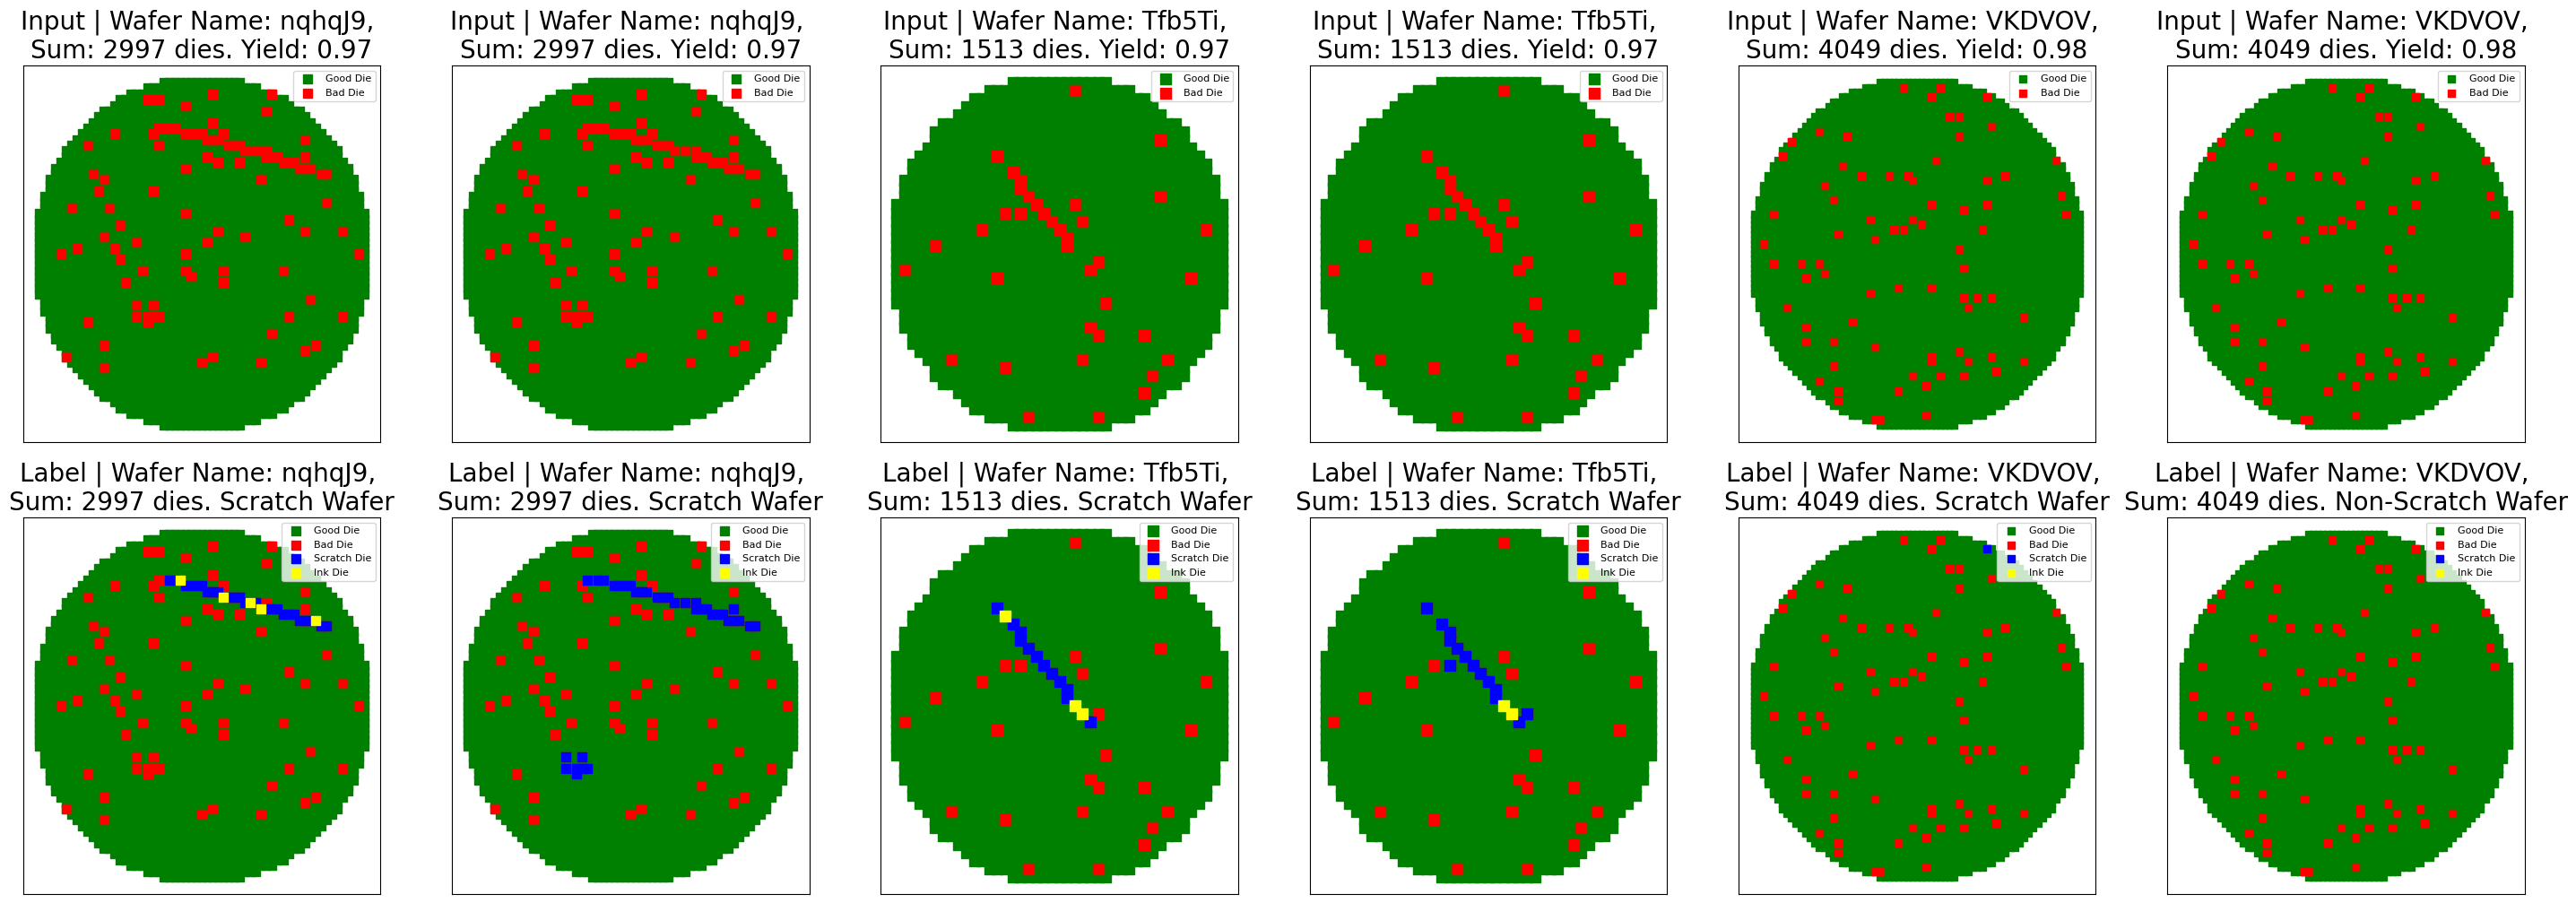

In [33]:
#felt like i need to make some visual comparison to determine model imperfection causses
def compare_ground_truth_vs_prediction(df, model, features, n_wafers=1, threshold=0.4, figsize=8):
    """
    Com
    """
    selected_wafer_names = df['WaferName'].sample(n=n_wafers).tolist()
    wafer_df_list = []

    for wafer_name in selected_wafer_names:
        wafer_df = df[df['WaferName'] == wafer_name].copy()

        X = wafer_df[features]
        wafer_df['IsScratchDie_pred'] = (model.predict_proba(X)[:, 1] >= threshold).astype(int)

        wafer_gt = wafer_df.copy()
        wafer_gt['IsScratchDie'] = wafer_gt['IsScratchDie']  # ground truth

        wafer_pred = wafer_df.copy()
        wafer_pred['IsScratchDie'] = wafer_pred['IsScratchDie_pred']  # prediction заменяет ground truth

        wafer_df_list.extend([wafer_gt, wafer_pred])

    plot_wafer_maps(wafer_df_list, figsize=figsize, labels=True)

compare_ground_truth_vs_prediction(
    df=df_train,
    model=final_model,
    features=FEATURES,
    n_wafers=3,   #outputs double inputs but its correct, it shows real  correct prediciton and model's prediciton
    threshold=0.35,
    figsize=6
)

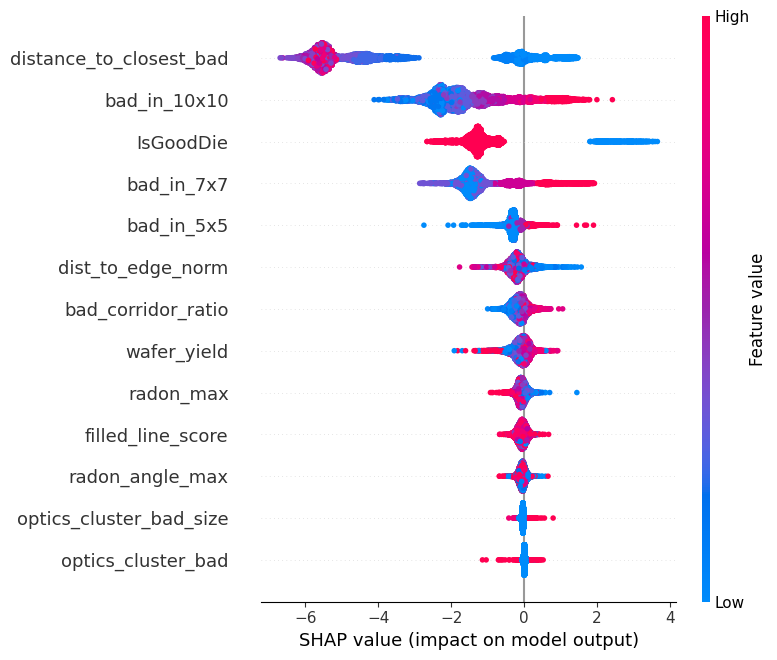

In [34]:
# Shap, to understand  waht fetures we can exclude to leave minimum set  of features.
sample = X_val.sample(10000, random_state=111)

explainer = shap.TreeExplainer(final_model, approximate=True)
shap_values = explainer.shap_values(sample, check_additivity=False)


shap.summary_plot(shap_values, sample, max_display=20)

In [43]:
pd.DataFrame(X_full.corr())

,IsGoodDie,wafer_yield,bad_in_5x5,bad_in_7x7,bad_in_10x10,distance_to_closest_bad,radon_max,radon_angle_max,bad_corridor_ratio,dist_to_edge_norm,filled_line_score,optics_cluster_bad,optics_cluster_bad_size
IsGoodDie,1.000000,0.056007,-0.104920,-0.105865,-0.102404,0.322821,-0.030519,0.000177,-0.025911,-0.017498,-0.036334,-0.572998,-0.620676
wafer_yield,0.056007,1.000000,-0.168120,-0.231004,-0.327152,0.244704,-0.544924,0.003160,-0.462632,0.002988,-0.648740,-0.040209,-0.029665
bad_in_5x5,-0.104920,-0.168120,1.000000,0.752403,0.540709,-0.556562,0.094155,-0.000600,0.078203,0.074852,0.110474,0.096729,0.132328
bad_in_7x7,-0.105865,-0.231004,0.752403,1.000000,0.740358,-0.593555,0.131169,-0.000929,0.107724,0.114512,0.152761,0.104129,0.140288
bad_in_10x10,-0.102404,-0.327152,0.540709,0.740358,1.000000,-0.521825,0.191449,-0.001529,0.153360,0.194229,0.219297,0.104727,0.140212
distance_to_closest_bad,0.322821,0.244704,-0.556562,-0.593555,-0.521825,1.000000,-0.164162,0.003821,-0.088202,-0.109538,-0.192644,-0.184976,-0.200367
radon_max,-0.030519,-0.544924,0.094155,0.131169,0.191449,-0.164162,1.000000,-0.015143,0.172812,0.013518,0.691333,0.044894,0.006845
radon_angle_max,0.000177,0.003160,-0.000600,-0.000929,-0.001529,0.003821,-0.015143,1.000000,0.021998,-0.000187,-0.009919,-0.000365,0.002137
bad_corridor_ratio,-0.025911,-0.462632,0.078203,0.107724,0.153360,-0.088202,0.172812,0.021998,1.000000,-0.002983,0.266540,0.009667,0.012623
dist_to_edge_norm,-0.017498,0.002988,0.074852,0.114512,0.194229,-0.109538,0.013518,-0.000187,-0.002983,1.000000,0.007483,0.014040,0.030608


In [44]:

X_scaled = StandardScaler().fit_transform(df_train[FEATURES])

pca = PCA(n_components=5, random_state=42)
pca.fit(X_scaled)

print("Explained Variance Ratio (5 PCs):")
for i, var in enumerate(pca.explained_variance_ratio_, 1):
    print(f"  PC{i}: {var:.4f}")

loadings = pd.DataFrame(
    pca.components_.T,
    index=FEATURES,
    columns=[f'PC{i}' for i in range(1, 6)]
)

top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(10)
print("\nTop 10 features by absolute loading on PC1:")
for feat, val in top_pc1.items():
    print(f"  {feat}: {val:.4f}")


Explained Variance Ratio (5 PCs):
  PC1: 0.2739
  PC2: 0.1748
  PC3: 0.1431
  PC4: 0.0776
  PC5: 0.0756

Top 10 features by absolute loading on PC1:
  bad_in_7x7: 0.4076
  bad_in_10x10: 0.3991
  distance_to_closest_bad: 0.3867
  bad_in_5x5: 0.3635
  wafer_yield: 0.3111
  filled_line_score: 0.2734
  radon_max: 0.2473
  optics_cluster_bad_size: 0.2081
  IsGoodDie: 0.2066
  optics_cluster_bad: 0.1958


## Clustering approach

For clustering, we cant use classic K-Means so i went to Skikit-Learn documentation about clustering to choose proper algorythm(2.3. Clustering):
https://scikit-learn.org/stable/modules/clustering.html
<figure>
  <img src="assets/sphx_glr_plot_cluster_comparison.png" width="350" height="280">
  <figcaption>Different clustering alorithms i Used</figcaption>
</figure>

So i decided to try HDBSCAN(I tried DBSCAN but his precision was too low) that is improved dendrogram-driven DBSCAN. Gaussian Mixture will not perform on correct wafers(see the reason in right bottom corner in the figure above). I'm not fammiliar with OPTICS but I should try it too.
EDIT: none of SCAN's is worked for me, they mark too much good dies as Ink or Scratch. I'm gonna try OPTICS. 

### Training
I'll be honest, i didn't suceed to opmize SVM learning too much and it took me alot of time to train/classify, and parameter tuning 
of much more, so idecided to not continue with this approach and focus on ensemble. But i noticed optics clusters relatively good a bad dices clusters so i can try to use it as feature.

In [ ]:
# df = df_train

# X = df[FEATURES]
# y = df['IsScratchDie'].astype(int)

# X_train, X_val, y_train, y_val = train_test_split(
#     X, y, test_size=0.3, stratify=y, random_state=42
# )

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled   = scaler.transform(X_val)

# #  train SVM classifier (RBF kernel, balanced class weights) - taking too muc htime need to optimize
# # batch trainig?
# svm = SVC(kernel='rbf', class_weight='balanced',
#           probability=True, random_state=42)
# svm.fit(X_train_scaled, y_train)

# #  Evaluate 
# y_val_prob = svm.predict_proba(X_val_scaled)[:, 1]
# y_val_pred = (y_val_prob >= 0.5).astype(int)

# print("SVM + OPTICS Features Evaluation")
# print("ROC-AUC:", round(roc_auc_score(y_val, y_val_prob), 4))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
# print("\nClassification Report:\n", classification_report(y_val, y_val_pred, digits=3))

## Outsource Your Problems!(Bonus solution)
I tried to showcase 10 suncessful examples of this work, but GPT Image API open only for organizations, so i'll provide a single test. It's of course 
not enought for proper evaluation, dont take this as serious part of solution, but I felt i must to suggest this because it's the most simpliest way
and can be surprisingly effective among other methods, and ofc implementable on organization level and can be used as part of buisness solution. In addition, i some cases GPT can't detect scratches very well, 
but I believe that automatic API tests, acess to finetuning, prompt engeneering and organization-level acses to more advanced models, can improve theese results.

<figure>
  <img src="assets/input_wafer.png" width="350" height="280">
  <figcaption>Wafer sent to GPT</figcaption>
</figure>

PROMPT = *I have a chip wafer crystal map with greeen cubes that represents okkay areas and red are damaged.
Help me detect a scratch here, and highligh it with other color(colour blocks blue that belongs to scratch).*
 
<figure>
  <img src="assets/output_wafer.png" width="350" height="280">
  <figcaption>Response wafer I got from GPT</figcaption>
</figure>

# Additional thoughts

Here you can detail about anything you want to mention as additional considerations for this solution, anything from ideas, thoughts, considerations about deployment or anything you may have raised when working on this task in a team.

In [ ]:
#TODO add your thoughts

'''
Okkay, so my first thought was the thought about model i'm familliar with and experienced - its Random Forest,
that could work good with tabular data, especially good in finding patterns and complex rules. 
The only problem that RF will accept as a input only.a single dice, which will not be useful since  we require data about whole wafer map. 
This is solvable with data engennering(finally i'm using skills I acquired at my degree :D).
I plan to add:
-wafer_yield: overall good ratio
With shap i understood that larger grids more important, but not tooo large:
-bad_in_5x5: bad neighbors count
-bad_in_7x7: larger bad count
-bad_in_10x10: widest bad count
-distance_to_closest_bad: minimum bad distance
One paper i found on the internet achieved good results after applying radon transformations on the dataset.
-radon_max: Radon max intensity
-radon_angle_max: Dominant line angle
-radon_mean: Average radon intensity
-radon_std: Radon intensity variability
-radon_prominence: Radon peak prominence
-bad_corridor_ratio: linear bad density
Somehow dist_to_edge_norm works better than distance to center...
-dist_to_edge_norm: normalized edge distance
-filled_line_score: line continuity score
Optics clusterization, less important following to SHAP, but without it i could not achieve 80% on f1-score.
optics_cluster_bad: bad cluster label
optics_cluster_bad_size: bad cluster size

In addition i want to point that there we want to concentrate on overall f1-score to evaluate the model. AUC and accuracy always will be 
good(many TN), recall must be the most important metric but because huge imbalance in data we need to watch precision since we can't let
the model just to color all the wafers to reach max recall, its minimum wasteful on buisnes level, so we need to balance. 

EDIT: I didn't suceed with RF model because of huge imbalance in data that i didn't suceed to close id different ways:
i tried undersampling, data enrichment, feature engeneering, sample generation. So, I decided to try another ensemble 4
model that I'm experinced with - XGBoost. 
Main goal - maintain high recall and precision on True class.
As I studied, 80%+ in such models can be suitable for buisness, especially if company has much more data and compute
to train such a model and can optimmize it with less features and more data, but final pipeline is:
1. Compute data engeneering features abowe
2. Optimize the model with optuna optimization script, if u have more compute u can make much more precise optimizations.
3. Evaluate the best model, use SHAP/PCA to remove less important feature. 
4. Repeat step 2 and 3 on new model, check f1-score(or recall if its more important) if its grew, once ahain check importance
and continue repeating this step until f1-score will not grow anymore and will start reducing(undertraining)
5. Save the most sucsessful model with most with the smallest number of features, and use. 

'''

'''
Next tried to think simplier and considered it as classic clustering problem. The problem is GoodDies that construct background, and not a real 
datapoints, so I'll perform clustering only on bad dies so it will not help in Inking. I tried different algorythms like DBSCAN, HDBSCAN and Gaussian Mixture, 
but none of them are universal enought to fit to all cases of scratches. I need to try OPTICS, and then try to divide scratch points from overall by cluster relation 
with SVM(learned about this approach for separating complex patterns in ML course, may be very precise but demands hyperparameter tuning for SVM 
that can be costly. 
EDIT: Optics performs relatively well in clustering of such a things, so i'll use his features to enrich XBGOOST too.
EDIT: SVM parameter tuning, and overall runtime is very slow, so i'll focus on other aproach. 
'''

'''
And the last though was using deep learning. Methods like CNN, Neural Networks, Unet, Autoencoders and segmentation models like YOLOV can be useful.
After long considering, i've decided to not use deep learning approach for various reasons:
- Got only 4200 pics of wafer, may be not enough data for neural network. Can try solve with flipping and additional feature tuning.
- Computation cost/time.
- Model's that i know how to optimize well are inappropriate: CNN only answers to "if wafer scratched".
Closest to reality implmentable idea for me, to build autoencoder with 64x64 input window =>
=> feed him good wafers and then try to reconstruct scratched wafers =>  detect areas where encoder made errors => ink theese areas as scratch
but, since i achieved certain sucess with XGBOOST i think it will be too time consuming and costly to try to reach same metrics with deep.
'''

'''
Other idea was a crazy but yet simple solution, that don't require data, fast, and less than 10 lines long. Inspired by "Netflix prize" story(2009). 
One of the most important conclusions of this story is "OUTSOURSE YOUR PROBLEMS", so i thought, since new gpt(4o) have crazy image recognition, how well it could perform on chip wafers?
And it performed, pretty well, using just a single wafer picture and short prompt. 
I'm not gonna test it on test set since it can be very costly, but i'll attach the prompt and model settings.
'''

# Submission

In [45]:
final_model = xgb.XGBClassifier(
    device = "cuda", # remove it if you running on colab or you dont have gpu
    n_estimators     = 398,
    max_depth        = 10,
    learning_rate    = 0.0653764255605792,
    subsample        = 0.8288,
    colsample_bytree = 0.8044,
    objective        = "binary:logistic",
    eval_metric      = "auc",
    scale_pos_weight = pos_weight,
    n_jobs           = -1,
    random_state     = 42
)
# training on WHOLE dataset since we will not be able to evaluate that later and need the best values prediction
# more data is not always better, but in my case i think idefinetly underfit my model and need more data
# considered generating wafers pic by myself too, but was too time consty and cant't generate authomatically
# realistic real-life scratches.
final_model.fit(X_full, y_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8044, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.0653764255605792,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=398, n_jobs=-1,
              num_parallel_tree=None, ...)

In [46]:
df_wafers_test = pd.read_csv("df_test.csv")[FEATURES]
df_wafers_test.head()

,IsGoodDie,wafer_yield,bad_in_5x5,bad_in_7x7,bad_in_10x10,distance_to_closest_bad,radon_max,radon_angle_max,bad_corridor_ratio,dist_to_edge_norm,filled_line_score,optics_cluster_bad,optics_cluster_bad_size
0,True,0.985986,0,0,0,16.643317,0.169847,36.79558,0.015873,0.191667,0.829268,-1,0
1,True,0.985986,0,0,0,17.204651,0.169847,36.79558,0.015873,0.200000,0.829268,-1,0
2,True,0.985986,0,0,0,17.804494,0.169847,36.79558,0.015873,0.208333,0.829268,-1,0
3,True,0.985986,0,0,0,18.439089,0.169847,36.79558,0.015873,0.216667,0.829268,-1,0
4,True,0.985986,0,0,0,18.788294,0.169847,36.79558,0.015873,0.225000,0.829268,-1,0


In [43]:
#TODO

model = final_model
IsScratchDie = model.predict(df_wafers_test)
df_wafers_test['IsScratchDie'] = IsScratchDie

#TODO Fill in your name and email
name = 'Alexey Shvachko'
email = 'alex.shvachko.wrk@gmail.com'

#Dont change the following code
date_str = datetime.now().strftime('%Y%m%d')
filename = f"{date_str}_{name}_{email}_df_wafers_test_with_preds.csv"
df_wafers_test.to_csv(filename, index=False)
print("Saved file:", filename)

Saved file: 20250426_Alexey Shvachko_alex.shvachko.wrk@gmail.com_df_wafers_test_with_preds.csv
